### 1. Dataset Description  <a id='columns'>

The dataset consists of 10000 individuals and whether their credit card has defaulted or not. Below are the column description:
- **default** : Whether the individual has defaulted
- **student** : Whether the individual is student
- **balance** : The balance in individual's account
- **income** : Income of individual

### 2. Importing the packages and dataset  <a id='packages'>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling

In [2]:
#Load Credit Default File

cred_df = pd.read_csv("CrCard_default.csv")

### 3. Exploratory Data Analysis  <a id='eda'>

In [3]:
cred_df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [4]:
cred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


** Observation ** : There are no missing values

Profiling

In [5]:
report = pandas_profiling.ProfileReport(cred_df)
#covert profile report as html file
report.to_file("credit.html")

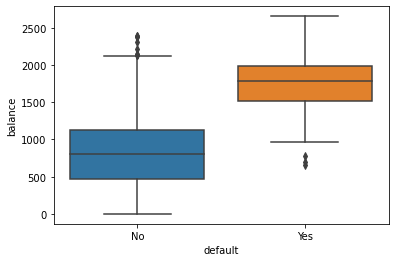

In [6]:
# Relation between balance and default

sns.boxplot(x='default', y='balance', data=cred_df)
plt.show()
# Those with high balance are more defaulters

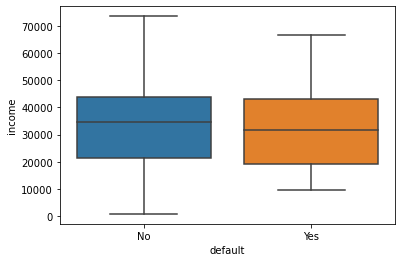

In [7]:
# Relation between income and default

sns.boxplot(x='default', y='income', data=cred_df)
plt.show()

# Income doesnt make an impact on default
# Better to choose balance as a feature than income (feature selection)

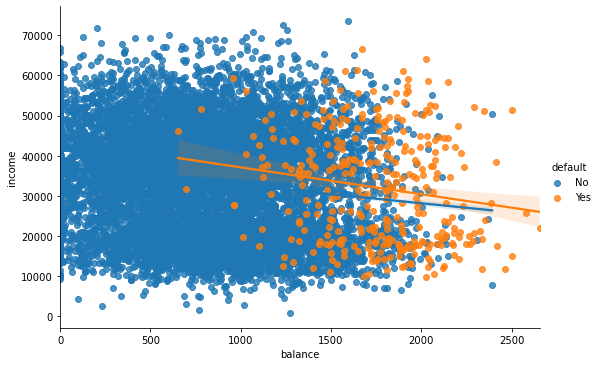

In [8]:
# Relation between balance and income and whether they have defaulted or not 

sns.lmplot(x='balance', y='income', hue = 'default', data=cred_df, aspect=1.5, fit_reg = True)
plt.show()
# Good Spread, there is no linear relation ship,

In [9]:
# Relation between Student and default

pd.crosstab(cred_df['default'], cred_df['student'], rownames=['Default'], colnames=['Student'])

#students are not the ones defaulting a lot

Student,No,Yes
Default,,
No,6850,2817
Yes,206,127


### 4. Feature Engineering  <a id='feature'>

In [10]:
# Convert Categorical to Numerical for default column

default_dummies = pd.get_dummies(cred_df.default, prefix='default', drop_first= True)
cred_df = pd.concat([cred_df, default_dummies], axis=1)
cred_df.head()

,default,student,balance,income,default_Yes
0,No,No,729.526495,44361.625074,0
1,No,Yes,817.180407,12106.134700,0
2,No,No,1073.549164,31767.138947,0
3,No,No,529.250605,35704.493935,0
4,No,No,785.655883,38463.495879,0


In [11]:
# Convert Categorical to Numerical for student column

student_dummies = pd.get_dummies(cred_df.student, prefix='student', drop_first= True)
cred_df = pd.concat([cred_df, student_dummies], axis=1)
cred_df.head()

,default,student,balance,income,default_Yes,student_Yes
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0
3,No,No,529.250605,35704.493935,0,0
4,No,No,785.655883,38463.495879,0,0


### 5. Building and Evaluating Models  <a id='modelling'>

### 5.1 Simple Linear Regression  <a id='linear'>

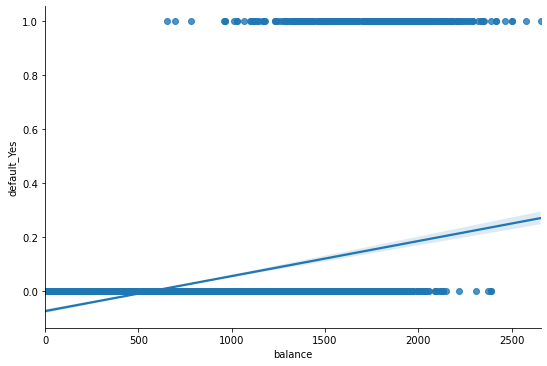

In [12]:
# Try simple linear regression on the data between balance and default

sns.lmplot(x='balance', y='default_Yes', data=cred_df, aspect=1.5, fit_reg = True)


# lmplot will allways give a single line
# doesnt fit a LinReg, we cannot put a thresh hold, so we have to use LogReg

In [13]:
# Building Linear Regression Model and determining the coefficients

from sklearn.linear_model import LinearRegression

X = cred_df[['balance']]
y = cred_df['default_Yes']

linreg = LinearRegression()
linreg.fit(X, y)
# .fit is the model

print(linreg.coef_)                                         # Coefficients for Linear Regression
print(linreg.intercept_)

[0.00012987]
-0.0751919588462226


### 5.2 Logistic Regression  <a id='logistic'>

[[0.00549892]]
[-10.65132824]


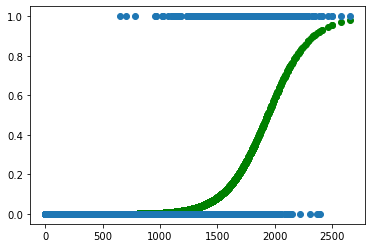

In [14]:
# Building the Logistic Regression Model

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs')                            # Set Large C value for low regularization
logreg.fit(X, y)

print(logreg.coef_)                                            # Coefficients for Logistic Regression
print(logreg.intercept_)

y_pred = logreg.predict_proba(X)                               
plt.scatter(X.values, y_pred[:,1],color='green')                             # Visualization
plt.scatter(X.values, y)
plt.show()

### 5.3 Evaluating Simple Linear Regression Model  <a id='lineareval'>

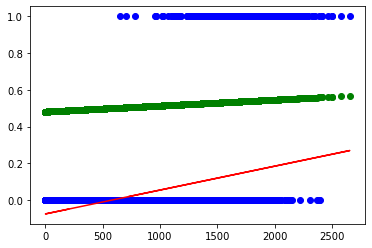

In [15]:
x = X.values
y_hat = linreg.intercept_ + linreg.coef_ * x                  # Predicting y using linear regression coefficients
sig_y_hat = np.exp(y_hat)/(1+np.exp(y_hat))                   # Equation for Sigmoid function

plt.plot(x, y_hat, color='red')                               # Visualizing
plt.scatter(x, y, color = 'blue')
plt.scatter(x, sig_y_hat, color = 'green')
plt.show()

### 5.4 Evaluating Logistic Regression Model   <a id='logisticeval'>

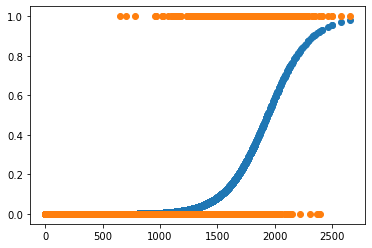

In [16]:
x = X
y_hat = logreg.intercept_ + logreg.coef_ * x                     # Predicting y using linear regression coefficients
sig_y_hat = np.exp(y_hat)/(1+np.exp(y_hat))                      # Equation for Sigmoid

plt.scatter(x=x, y=sig_y_hat)                                    # Visualizing
plt.scatter(x=x, y=y)
plt.show()

### 6. Logistic Regression  <a id='lrmodel'>

In [17]:
cred_df.head()

,default,student,balance,income,default_Yes,student_Yes
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0
3,No,No,529.250605,35704.493935,0,0
4,No,No,785.655883,38463.495879,0,0


In [18]:
# Removing repeat columns

cred_df.drop(['default', 'student'], axis=1, inplace=True)

In [19]:
cred_df.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


In [20]:
# splitting the features and labels

X = cred_df.drop('default_Yes',axis = 1)
y = cred_df['default_Yes']

In [21]:
# splitting the data into train and test with 70:30 ratio

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [22]:
# calling logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(C=.1)

In [23]:
# fitting the model with x and y attributes of train data
# in this it is goin to learn the pattern
logreg.fit(x_train, y_train)
# C Regularisation Parameter to make the model more generalize for output

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
# now applying our learnt model on test and also on train data
y_pred_test = logreg.predict(x_test)
y_pred_train = logreg.predict(x_train)

### 7. Metrics for Logistic Regression  <a id='metrics'>

In [25]:
# comparing the metrics of predicted lebel and real label of test data
metrics.accuracy_score(y_test, y_pred_test)

0.968

In [26]:
# comparing the metrics of predicted lebel and real label of test data
metrics.accuracy_score(y_train, y_pred_train)

0.9662857142857143

In [27]:
# creating a confusion matrix to understand the classification
conf = metrics.confusion_matrix(y_test, y_pred_test)

In [28]:
print(conf)

[[2893   13]
 [  83   11]]


In [29]:
# Actual Values of y_test
y_test.value_counts()

0    2906
1      94
Name: default_Yes, dtype: int64

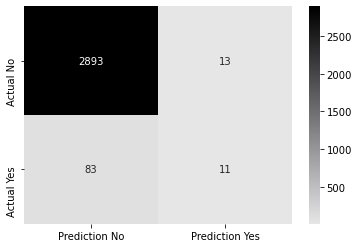

In [30]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(conf,cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,
            fmt='d')

In [31]:
# Creating Classification Report

cr = metrics.classification_report(y_test, y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2906
           1       0.46      0.12      0.19        94

    accuracy                           0.97      3000
   macro avg       0.72      0.56      0.59      3000
weighted avg       0.96      0.97      0.96      3000

